In [49]:
import pandas as pd
import seaborn as sb
import tensorflow as tf

df= pd.read_csv('data/Ca_fire_weather.csv')
# df = df.drop(["fall","spring","summer", "winter", "weekday", "weekend"], axis = 1)
df.head(3)

,Unnamed: 0,AcresBurned,ArchiveYear,Precip (in),Days Burned,Precipitation,Temperature,Humidity,Wind Speed,CalFireIncident 0,...,CIMIS Region 2,CIMIS Region 3,CIMIS Region 4,CIMIS Region 5,CIMIS Region 6,CIMIS Region 7,CIMIS Region 8,CIMIS Region 9,CIMIS Region 10,CIMIS Region 11
0,0,410203.0,0.0,0.0,0.447222,0.075170,0.694110,0.769694,0.286721,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,48920.0,0.0,0.0,0.447222,0.075170,0.694110,0.769694,0.286721,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,75.0,0.0,0.0,0.511111,0.066545,0.715255,0.770036,0.283663,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [50]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler

X = df.drop(["Unnamed: 0", "AcresBurned"], axis = 1).values
Y = df["AcresBurned"]
target_scaler = MinMaxScaler()
target_scaler.fit(X)
X = target_scaler.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .3, random_state = 0)


In [51]:
nfeatures = X_train.shape[1]
print("the number of feature = ", nfeatures)

the number of feature =  107


using early stop to check if overfiting

In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from keras.callbacks import Callback
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import keras

model1 = Sequential([
  Dense(64, activation='relu', input_shape=(nfeatures,)),                    
  Dense(16, activation='relu'),
  Dense(1, activation='relu'),
])



model1.summary()
model1.compile(
  optimizer='adam',
  loss= 'mean_squared_error',
  metrics=[  'mean_squared_error']
)
es = EarlyStopping(monitor='val_loss', mode='min')
Weight = []
print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: Weight.append(model1.layers[2].get_weights()))

history = model1.fit(
  X_train,
  Y_train,
  validation_data = (X_test, Y_test),
  epochs = 1000,
  batch_size=20,
    callbacks=[es,print_weights]
)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 64)                6912      
_________________________________________________________________
dense_100 (Dense)            (None, 16)                1040      
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 17        
Total params: 7,969
Trainable params: 7,969
Non-trainable params: 0
_________________________________________________________________
Train on 314 samples, validate on 135 samples
Epoch 1/1000
314/314 [==============================] - 1s 4ms/step - loss: 708432077.3551 - mean_squared_error: 708432077.3551 - val_loss: 439347598.6539 - val_mean_squared_error: 439347598.6539
Epoch 2/1000
314/314 [==============================] - 0s 127us/step - loss: 708430074.9473 - mean_squared_error: 708430074.9473 - val_loss: 439345756.5758 - val

314/314 [==============================] - 0s 140us/step - loss: 704487179.0053 - mean_squared_error: 704487179.0053 - val_loss: 435670401.2789 - val_mean_squared_error: 435670401.2789
Epoch 39/1000
314/314 [==============================] - 0s 102us/step - loss: 704204767.0535 - mean_squared_error: 704204767.0535 - val_loss: 435431682.9502 - val_mean_squared_error: 435431682.9502
Epoch 40/1000
314/314 [==============================] - 0s 98us/step - loss: 703971586.1301 - mean_squared_error: 703971586.1301 - val_loss: 435137007.6898 - val_mean_squared_error: 435137007.6898
Epoch 41/1000
314/314 [==============================] - 0s 108us/step - loss: 703638778.1417 - mean_squared_error: 703638778.1417 - val_loss: 434872379.0347 - val_mean_squared_error: 434872379.0347
Epoch 42/1000
314/314 [==============================] - 0s 92us/step - loss: 703332400.4958 - mean_squared_error: 703332400.4958 - val_loss: 434614732.0498 - val_mean_squared_error: 434614732.0498
Epoch 43/1000
314/314

314/314 [==============================] - 0s 162us/step - loss: 689686359.3280 - mean_squared_error: 689686359.3280 - val_loss: 424435228.1111 - val_mean_squared_error: 424435228.1111
Epoch 80/1000
314/314 [==============================] - 0s 130us/step - loss: 689332386.6592 - mean_squared_error: 689332386.6592 - val_loss: 424159293.0648 - val_mean_squared_error: 424159293.0648
Epoch 81/1000
314/314 [==============================] - 0s 206us/step - loss: 689003647.9172 - mean_squared_error: 689003647.9172 - val_loss: 423872003.0926 - val_mean_squared_error: 423872003.0926
Epoch 82/1000
314/314 [==============================] - 0s 241us/step - loss: 688518177.5637 - mean_squared_error: 688518177.5637 - val_loss: 423662029.1111 - val_mean_squared_error: 423662029.1111
Epoch 83/1000
314/314 [==============================] - 0s 200us/step - loss: 688143417.3105 - mean_squared_error: 688143417.3105 - val_loss: 423458565.0556 - val_mean_squared_error: 423458565.0556
Epoch 84/1000
314/3

314/314 [==============================] - 0s 143us/step - loss: 673284058.9745 - mean_squared_error: 673284058.9745 - val_loss: 415678068.5926 - val_mean_squared_error: 415678068.5926
Epoch 121/1000
314/314 [==============================] - 0s 152us/step - loss: 673001091.3185 - mean_squared_error: 673001091.3185 - val_loss: 415500175.5185 - val_mean_squared_error: 415500175.5185
Epoch 122/1000
314/314 [==============================] - 0s 181us/step - loss: 672542339.1847 - mean_squared_error: 672542339.1847 - val_loss: 415415453.5556 - val_mean_squared_error: 415415453.5556
Epoch 123/1000
314/314 [==============================] - 0s 127us/step - loss: 672250774.2803 - mean_squared_error: 672250774.2803 - val_loss: 415230251.6667 - val_mean_squared_error: 415230251.6667
Epoch 124/1000
314/314 [==============================] - 0s 175us/step - loss: 671859921.7134 - mean_squared_error: 671859921.7134 - val_loss: 415079331.9259 - val_mean_squared_error: 415079331.9259
Epoch 125/1000


314/314 [==============================] - 0s 171us/step - loss: 658612120.8981 - mean_squared_error: 658612120.8981 - val_loss: 411499350.9630 - val_mean_squared_error: 411499350.9630
Epoch 162/1000
314/314 [==============================] - ETA: 0s - loss: 23425048.0000 - mean_squared_error: 23425048.00 - 0s 184us/step - loss: 658310729.5414 - mean_squared_error: 658310729.5414 - val_loss: 411421986.2222 - val_mean_squared_error: 411421986.2222
Epoch 163/1000
314/314 [==============================] - 0s 111us/step - loss: 657884884.3121 - mean_squared_error: 657884884.3121 - val_loss: 411366832.9630 - val_mean_squared_error: 411366832.9630
Epoch 164/1000
314/314 [==============================] - 0s 118us/step - loss: 657584764.9618 - mean_squared_error: 657584764.9618 - val_loss: 411318935.3333 - val_mean_squared_error: 411318935.3333
Epoch 165/1000
314/314 [==============================] - 0s 124us/step - loss: 657278335.2611 - mean_squared_error: 657278335.2611 - val_loss: 41128

In [73]:
y_pred = model1.predict(X_test, batch_size=200)
y_pred


array([[11497.494   ],
       [ 6701.6997  ],
       [    0.      ],
       [    0.      ],
       [  569.6628  ],
       [ 2662.9922  ],
       [12345.056   ],
       [    0.      ],
       [    0.      ],
       [  860.4211  ],
       [    0.      ],
       [  268.47916 ],
       [    0.      ],
       [  583.23004 ],
       [    0.      ],
       [ 7004.7466  ],
       [   86.101074],
       [12544.735   ],
       [ 9406.098   ],
       [ 1736.0472  ],
       [    0.      ],
       [  730.4449  ],
       [ 1475.0656  ],
       [ 6641.0776  ],
       [ 7162.4575  ],
       [    0.      ],
       [    0.      ],
       [ 3337.4053  ],
       [   46.745968],
       [  150.08684 ],
       [ 8182.2075  ],
       [    0.      ],
       [    0.      ],
       [    0.      ],
       [  584.26166 ],
       [  386.42987 ],
       [    0.      ],
       [  931.3129  ],
       [ 5712.9917  ],
       [  766.11224 ],
       [    0.      ],
       [ 6823.6196  ],
       [    0.      ],
       [  1

here is the best answer we can get now

In [75]:
model1.layers[0].get_weights()

[array([[ 0.0847393 , -0.21066707, -0.22045672, ..., -0.25789878,
         -0.35546115, -0.17671278],
        [-0.9089451 , -0.90688175, -0.99559784, ..., -0.81373894,
         -1.0197372 , -0.83574104],
        [ 0.9862657 ,  1.0303444 ,  0.79716134, ...,  1.0589195 ,
          1.1905246 ,  1.1764356 ],
        ...,
        [-1.1633946 , -1.3129886 , -1.4685228 , ..., -1.1525528 ,
         -1.4057732 , -1.1815265 ],
        [-1.5320411 , -1.8871266 , -2.1952465 , ..., -1.69083   ,
         -1.9839066 , -1.9291594 ],
        [-0.00474186,  0.27966335,  0.24330199, ...,  0.10664774,
         -0.0886744 ,  0.1318196 ]], dtype=float32),
 array([ 1.3825624 ,  1.3869019 ,  1.2494477 ,  1.3762912 ,  1.3648653 ,
         1.3638686 , -0.02077526,  1.3361506 ,  1.3526947 ,  1.3409866 ,
         0.        ,  1.3803196 ,  1.1866364 ,  0.17077315, -0.01804877,
         1.3952675 ,  1.3671607 ,  1.371116  ,  1.3527321 ,  1.3983632 ,
         1.3786869 ,  1.3465362 ,  1.4034064 ,  1.3484343 ,  1.316

In [76]:
model1.layers[1].get_weights()

[array([[ 1.6861376 ,  1.8318694 ,  0.25850418, ...,  0.23608173,
          0.12813568,  1.7762203 ],
        [ 1.6179955 ,  1.5052055 , -0.1608898 , ..., -0.03382648,
         -0.1623081 ,  1.8151774 ],
        [ 1.742994  ,  1.2553691 , -0.23925136, ...,  0.16364677,
         -0.1379999 ,  1.4534628 ],
        ...,
        [ 1.8488398 ,  1.6897995 , -0.18386047, ...,  0.20532444,
         -0.03641775,  1.6238613 ],
        [ 1.6033058 ,  1.5541625 , -0.13990583, ..., -0.18372849,
          0.03110544,  1.3761    ],
        [ 1.7427619 ,  1.5017127 , -0.18580776, ...,  0.04094477,
         -0.14925627,  1.6992472 ]], dtype=float32),
 array([ 1.2082363 ,  1.0462058 , -0.01830179,  0.38587338,  1.0370058 ,
         1.1537476 , -0.01929984,  1.118086  , -0.03250295,  1.0415734 ,
         0.42464358, -0.01885349,  1.1759319 , -0.03979813, -0.02956524,
         1.1205037 ], dtype=float32)]

In [77]:
model1.layers[2].get_weights()

[array([[ 1.7004353 ],
        [ 2.1244898 ],
        [-0.2129599 ],
        [-2.5134196 ],
        [ 2.1824548 ],
        [ 1.8400973 ],
        [-0.35297984],
        [ 2.0157745 ],
        [-0.51324576],
        [ 2.1559608 ],
        [-3.04717   ],
        [-0.48405087],
        [ 1.7842243 ],
        [-0.09719712],
        [-0.2707932 ],
        [ 1.9270251 ]], dtype=float32), array([0.8326031], dtype=float32)]

Text(0.5, 1.0, 'loss plot')

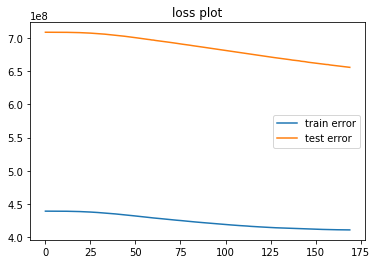

In [79]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], label="train error")
plt.plot(history.history['loss'], label="test error")
plt.legend()
plt.title("loss plot")

Text(0.5, 1.0, 'weights plot')

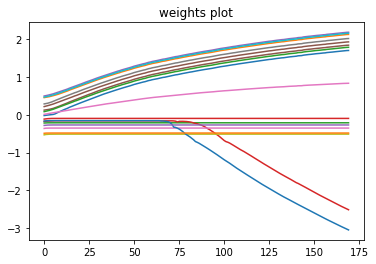